In [1]:
library(dplyr)
library(ggfortify)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2


In [3]:
# load the experiment design
doe <- read.csv("v2_pyDOE_lhs_description.csv", header = TRUE)
# load the results
results <- read.csv("horseshoe-trialv2 horseshoe version 2 lhs-table.csv", skip=6, header = TRUE)

# rename the index of the experiment design data to simplify merging
colnames(doe)[1] <- "experiment.number"

data <- merge(doe, results, "experiment.number")
filtered.data <- data[data$X.step!=20000,]

Assign each run to a quintile level for each metric to allow for quick grouping.

In [4]:
filtered.data %>% mutate(
    mine.quintile = ntile(filtered.data$count.mine.contacts, 5),
    step.quintile = ntile(filtered.data$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.quintiles

In [7]:
colnames(filtered.data)

[1] "experiment.number"             "turn.radius"                  
 [3] "uuv.speed"                     "nav.bearing.std"              
 [5] "nav.velocity.std.cm"           "max.obs.dist"                 
 [7] "obs.influence"                 "sonar_ping_rate"              
 [9] "side_angle"                    "side_low_range"               
[11] "side_hi_range"                 "signal.factor"                
[13] "forward_angle"                 "forward_lo_range"             
[15] "forward_hi_range"              "classification.threshold.std" 
[17] "X.run.number."                 "X.step."                      
[19] "objective.mine.speed"          "objective.mine.position"      
[21] "objective.mine.detected.ratio" "number.of.collisions"         
[23] "max.nav.error"                 "count.mine.contacts"          
[25] "marker.mean"                   "marker.std.dev"               
[27] "X.link.length..of.fix.links"

In [6]:
head(data.quintiles)

experiment.number,turn.radius,uuv.speed,nav.bearing.std,nav.velocity.std.cm,max.obs.dist,obs.influence,sonar_ping_rate,side_angle,side_low_range,...,count.mine.contacts,marker.mean,marker.std.dev,X.link.length..of.fix.links,mine.quintile,step.quintile,nav.error.quintile,marker.mean.quintile,marker.std.quintile,collisions.quintile
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,191,120.77713,55.46842,[197.8575091367711],5,3,2,4,3,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,186,42.97394,31.44494,[412.4999448093565],5,3,3,2,2,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,89,147.07681,126.07107,[97.84658341239738],3,3,4,4,5,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,168,54.00629,45.10185,[139.2164050620629],5,3,2,2,3,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,184,60.66530,26.84500,[65.31866813234589],5,3,2,3,2,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,195,50.87659,40.44766,[68.17299940033458],5,3,2,2,3,1


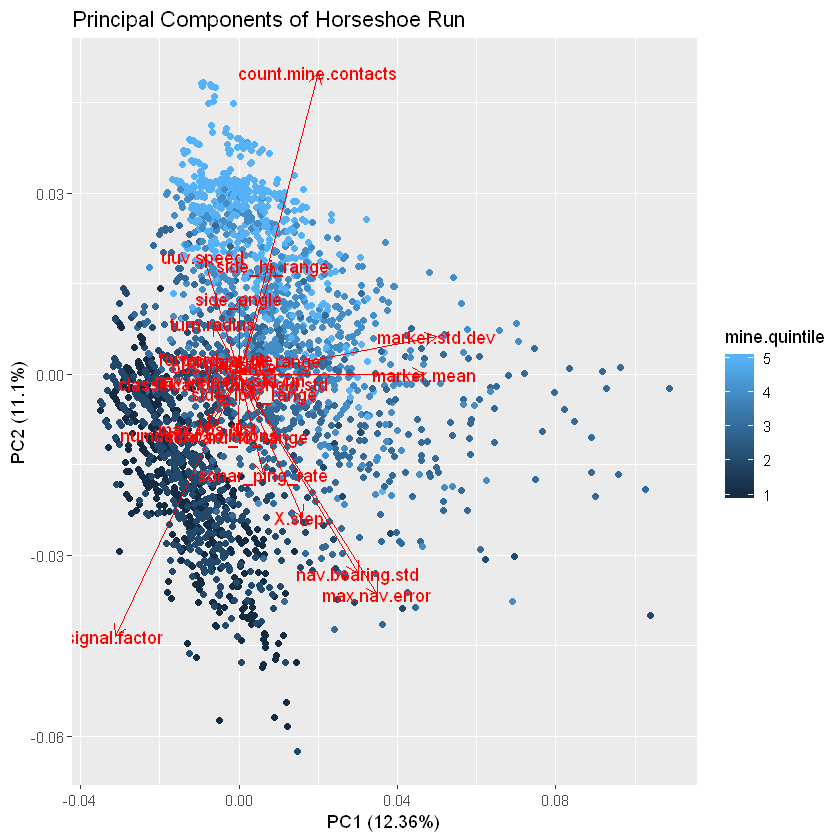

In [8]:
# PCA of input and output metrics
filtered.data.pca <- prcomp(filtered.data[c(2:16,18,22:26)], scale=TRUE)
#filtered.data.pca <- prcomp(filtered.data[c(2:13,15:18,25)], scale=TRUE)
autoplot(filtered.data.pca, data=data.quintiles, colour='mine.quintile', main="Principal Components of Horseshoe Run", loadings=TRUE, loadings.label=TRUE)

In [9]:
summary(filtered.data.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.6109 1.5265 1.32460 1.15028 1.08489 1.07281 1.05938
Proportion of Variance 0.1236 0.1110 0.08355 0.06301 0.05605 0.05481 0.05344
Cumulative Proportion  0.1236 0.2345 0.31808 0.38109 0.43713 0.49194 0.54538
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.03074 1.01633 1.00228 0.96662 0.94268 0.90816 0.89368
Proportion of Variance 0.05059 0.04919 0.04784 0.04449 0.04232 0.03927 0.03803
Cumulative Proportion  0.59597 0.64516 0.69300 0.73749 0.77981 0.81908 0.85711
                          PC15    PC16    PC17   PC18    PC19    PC20    PC21
Standard deviation     0.86766 0.83165 0.80642 0.5383 0.49613 0.49079 0.35919
Proportion of Variance 0.03585 0.03294 0.03097 0.0138 0.01172 0.01147 0.00614
Cumulative Proportion  0.89296 0.92590 0.95687 0.9707 0.98239 0.99386 1.00000

In [10]:
filtered.data.pca
# PC1 - navigation/localization
# PC2 - mine detection
# PC3 - speed / mission time
# PC4 - obstacle avoidance

Standard deviations (1, .., p=21):
 [1] 1.6108655 1.5265134 1.3245969 1.1502811 1.0848873 1.0728095 1.0593781
 [8] 1.0307442 1.0163332 1.0022818 0.9666223 0.9426844 0.9081624 0.8936809
[15] 0.8676581 0.8316547 0.8064157 0.5383231 0.4961315 0.4907876 0.3591850

Rotation (n x k) = (21 x 21):
                                       PC1           PC2         PC3
turn.radius                  -0.0675317637  0.0884947959 -0.08243205
uuv.speed                    -0.0952087563  0.2059606228  0.63060074
nav.bearing.std               0.3189411822 -0.3489787818  0.25756992
nav.velocity.std.cm          -0.0231357302 -0.0096489017  0.07700869
max.obs.dist                 -0.0810965294 -0.0944681895  0.04531192
obs.influence                -0.0381320720  0.0131306867 -0.05491261
sonar_ping_rate               0.0654182643 -0.1758145084  0.17689449
side_angle                    0.0018944046  0.1323768435 -0.15799555
side_low_range                0.0418536693 -0.0335845889 -0.03676758
side_hi_range      

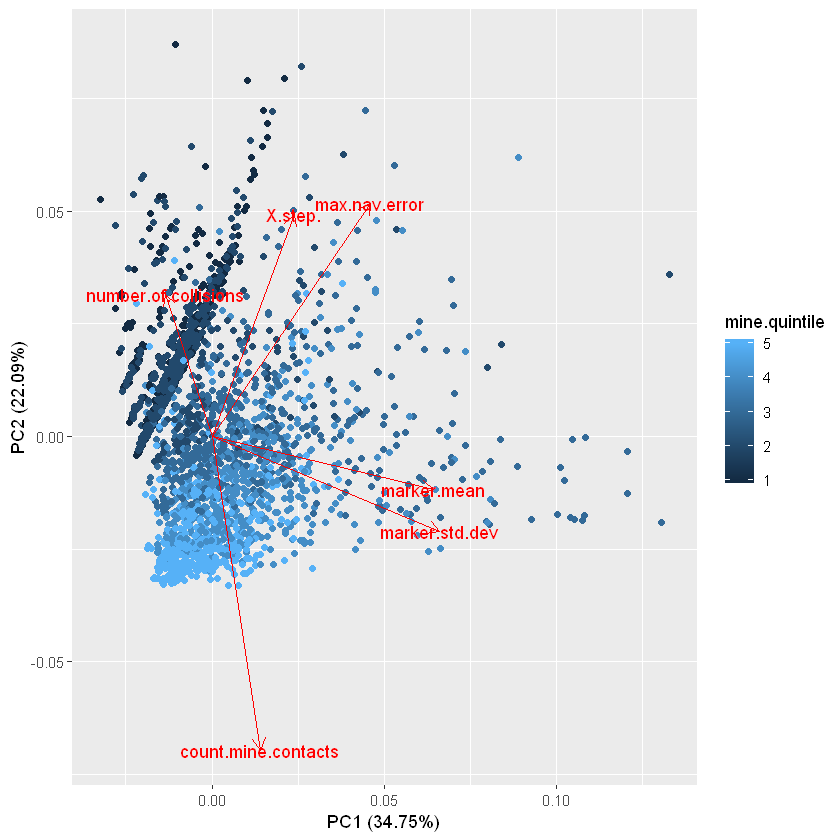

In [11]:
# PCA of the output metrics
out.data.pca <- prcomp(filtered.data[c(18,22:26)], scale=TRUE)
autoplot(out.data.pca, data=data.quintiles, colour='mine.quintile', loadings=TRUE, loadings.label=TRUE)

In [12]:
summary(out.data.pca)
out.data.pca

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6
Standard deviation     1.4440 1.1511 0.9879 0.9381 0.70391 0.48810
Proportion of Variance 0.3475 0.2209 0.1626 0.1467 0.08258 0.03971
Cumulative Proportion  0.3475 0.5684 0.7310 0.8777 0.96029 1.00000

Standard deviations (1, .., p=6):
[1] 1.4440374 1.1511451 0.9878647 0.9380897 0.7039127 0.4880973

Rotation (n x k) = (6 x 6):
                            PC1        PC2         PC3         PC4        PC5
X.step.               0.2221742  0.4581171 -0.28415363  0.74466926 -0.3241992
number.of.collisions -0.1245464  0.2938319 -0.84419375 -0.41387884  0.1191307
max.nav.error         0.4287531  0.4820863  0.21805430 -0.02373055  0.7222377
count.mine.contacts   0.1315798 -0.6484590 -0.38478370  0.41523969  0.4533565
marker.mean           0.5979391 -0.1098068 -0.04460511 -0.27725163 -0.3817687
marker.std.dev        0.6135578 -0.1970478 -0.09485691 -0.15593714 -0.0882944
                               PC6
X.step.              -0.0196621969
number.of.collisions -0.0002946129
max.nav.error         0.1184292822
count.mine.contacts   0.1901923207
marker.mean           0.6370289264
marker.std.dev       -0.7372983415

In [27]:
summary(filtered.data[c(20,24:28)])

    X.step.      number.of.collisions max.nav.error      count.mine.contacts
 Min.   : 2147   Min.   :0.0000       Min.   :   4.393   Min.   :  0.00     
 1st Qu.: 2796   1st Qu.:0.0000       1st Qu.: 941.911   1st Qu.: 40.00     
 Median : 3998   Median :0.0000       Median :1817.646   Median : 86.50     
 Mean   : 5536   Mean   :0.1779       Mean   :2029.267   Mean   : 93.77     
 3rd Qu.: 6875   3rd Qu.:0.0000       3rd Qu.:3007.275   3rd Qu.:147.25     
 Max.   :19874   Max.   :8.0000       Max.   :5589.648   Max.   :200.00     
  marker.mean     marker.std.dev  
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 36.40   1st Qu.: 23.58  
 Median : 76.33   Median : 45.09  
 Mean   :103.20   Mean   : 64.65  
 3rd Qu.:134.03   3rd Qu.: 83.80  
 Max.   :641.92   Max.   :371.23  